### Importing Needed packages


In [63]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.


In [64]:
Data_Frame = pd.read_csv('data3.csv')

# reading the Data in 

In [65]:
Data_Frame.head(10)

,date,tmin,tmax,prcp,snow,snwd,awnd
0,2017-01-01,41,50,0.54,0.0,0.0,6.49
1,2017-01-02,47,51,1.08,0.0,0.0,5.59
2,2017-01-03,47,56,0.31,0.0,0.0,5.37
3,2017-01-04,41,64,0.00,0.0,0.0,5.82
4,2017-01-05,29,44,0.00,0.0,0.0,2.01
5,2017-01-06,32,43,0.25,0.0,0.0,6.04
6,2017-01-07,20,32,0.60,0.5,0.0,9.62
7,2017-01-08,15,27,0.00,0.0,1.2,4.92
8,2017-01-09,9,31,0.00,0.0,1.2,2.46
9,2017-01-10,24,48,0.00,0.0,1.2,5.14


In [74]:
cdf = Data_Frame
Data_Frame.describe()

,tmin,tmax,prcp,snow,snwd,awnd
count,1977.000000,1977.000000,1977.000000,1977.000000,1976.000000,1973.000000
mean,51.088012,72.298938,0.135771,0.012838,0.016953,6.074805
std,15.889527,15.796087,0.370521,0.227433,0.215338,2.954427
min,4.000000,27.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,60.000000,0.000000,0.000000,0.000000,3.800000
50%,52.000000,74.000000,0.000000,0.000000,0.000000,5.800000
75%,66.000000,86.000000,0.060000,0.000000,0.000000,7.800000
max,78.000000,102.000000,4.960000,7.000000,5.900000,20.360000


# Convert Date column to Date Time

In [67]:
Data_Frame['date'] = pd.to_datetime(Data_Frame['date'])
Data_Frame = Data_Frame.set_index('date')
Data_Frame

,tmin,tmax,prcp,snow,snwd,awnd
date,,,,,,
2017-01-01,41,50,0.54,0.0,0.0,6.49
2017-01-02,47,51,1.08,0.0,0.0,5.59
2017-01-03,47,56,0.31,0.0,0.0,5.37
2017-01-04,41,64,0.00,0.0,0.0,5.82
2017-01-05,29,44,0.00,0.0,0.0,2.01
...,...,...,...,...,...,...
2022-05-27,68,81,1.12,0.0,0.0,10.70
2022-05-28,61,82,0.62,0.0,0.0,2.50
2022-05-29,59,88,0.00,0.0,0.0,2.70


We can plot each of these features:


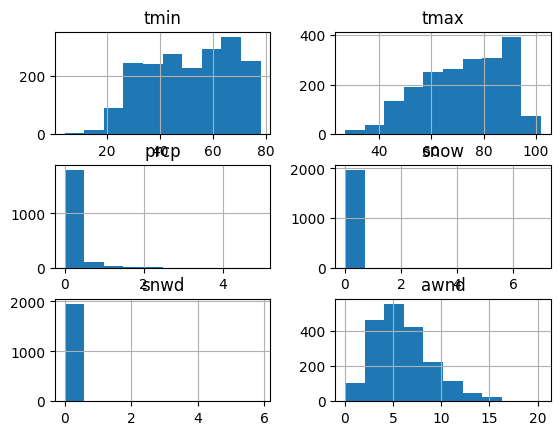

In [85]:
cdf.hist()
plt.show()

# Plot

In [83]:
model_temp = ARIMA(Data_Frame['tmin'], order=(1, 0, 0))
model_temp_fit = model_temp.fit()
temp_forecast = model_temp_fit.forecast(steps=3)
temp_forecast

C:\Users\seyed hasan emarati\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\seyed hasan emarati\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\seyed hasan emarati\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2022-06-01    66.442563
2022-06-02    65.028555
2022-06-03    63.744767
Freq: D, Name: predicted_mean, dtype: float64

In [84]:
model_humid = ARIMA(Data_Frame['tmax'], order=(1, 0, 0))
model_humid_fit = model_humid.fit()
humid_forecast = model_humid_fit.forecast(steps=3)
humid_forecast

C:\Users\seyed hasan emarati\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\seyed hasan emarati\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\seyed hasan emarati\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2022-06-01    89.688878
2022-06-02    87.648871
2022-06-03    85.848175
Freq: D, Name: predicted_mean, dtype: float64